In [1]:
import h5py
import numpy as np
from utils import *
import matplotlib.pyplot as plt

brainImg = h5py.File('../../data/assignmentSegmentBrainGmmEmMrf.mat')

image = np.array(brainImg["imageData"])
imageMask = np.array(brainImg["imageMask"]).astype(bool)
k = 3

# Initialize parameters

Initial estimate of means :  [0.62809513 0.26990758 0.50455764]
Initial estimate of variances :  [0.00136616 0.00598817 0.00194821]


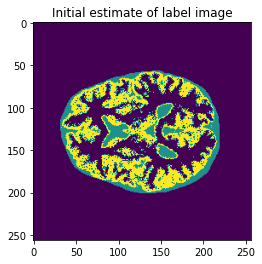

In [2]:
X_map_init,means_init,variances_init = initializeParams(image,imageMask)
plt.figure()
plt.imshow(X_map_init)
plt.title('Initial estimate of label image')
print("Initial estimate of means : ", means_init)
print("Initial estimate of variances : ", variances_init)

# Beta = 0

In [3]:
X_map, means, variances, memberships, posterior_values = getOptimalParams(image,imageMask,X_map_init,means_init,variances_init,0,max_iters=100)

0
---------------------------------------
Means [0.62751375 0.28848397 0.51427764]
Variances [0.00158494 0.00779193 0.00192382]
Log posterior -10641.40914928431 -9924.730439571453
---------------------------------------
1
---------------------------------------
Means [0.62784565 0.30416763 0.52002583]
Variances [0.00163428 0.00948481 0.00181429]
Log posterior -8535.156503538186 -8304.072315700541
---------------------------------------
2
---------------------------------------
Means [0.6287353  0.318558   0.52390757]
Variances [0.0016183  0.01113729 0.00171449]
Log posterior -7841.77230703834 -7691.827869004061
---------------------------------------
3
---------------------------------------
Means [0.62985838 0.33173202 0.52671097]
Variances [0.00157471 0.01270553 0.0016373 ]
Log posterior -7457.969239457347 -7347.419943544295
---------------------------------------
4
---------------------------------------
Means [0.63100321 0.34337844 0.52878211]
Variances [0.00152182 0.01412718 0.001

Text(0.5, 1.0, 'Class 2')

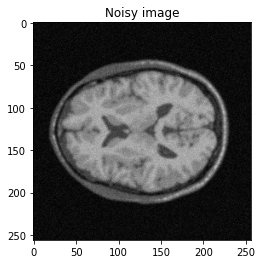

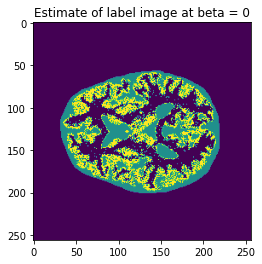

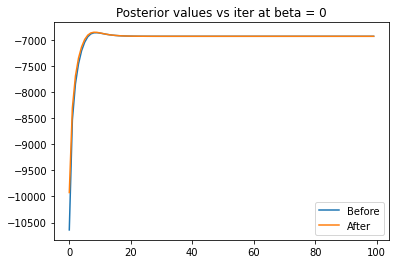

<Figure size 432x288 with 0 Axes>

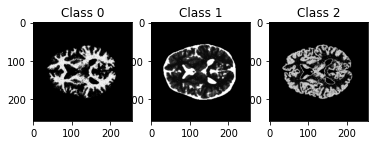

In [4]:
plt.figure()
plt.imshow(image,cmap='gray', vmin=0, vmax=1)
plt.title('Noisy image')
plt.figure()
plt.imshow(X_map)
plt.title('Estimate of label image at beta = 0')
plt.figure()
plt.plot(posterior_values[:,0],label='Before')
plt.plot(posterior_values[:,1],label='After')
plt.title('Posterior values vs iter at beta = 0')
plt.legend()
plt.figure()
_,axis = plt.subplots(1,3)
axis[0].imshow(memberships[:,:,0],cmap='gray', vmin=0, vmax=1)
axis[0].set_title('Class 0')
axis[1].imshow(memberships[:,:,1],cmap='gray', vmin=0, vmax=1)
axis[1].set_title('Class 1')
axis[2].imshow(memberships[:,:,2],cmap='gray', vmin=0, vmax=1)
axis[2].set_title('Class 2')

# Tuning Beta

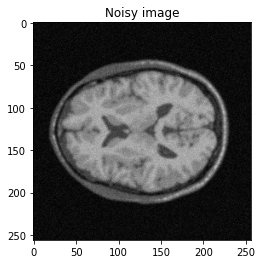

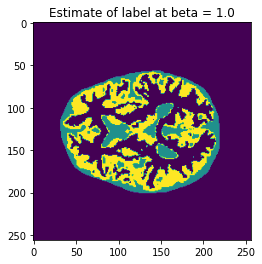

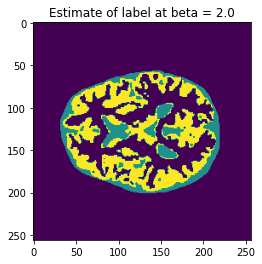

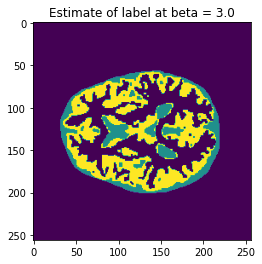

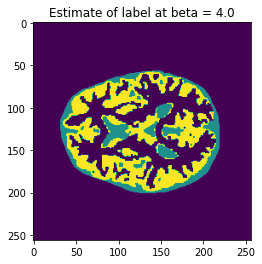

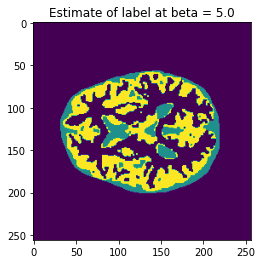

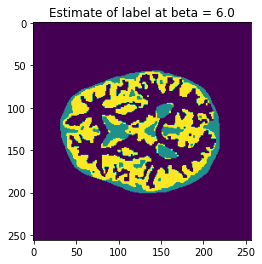

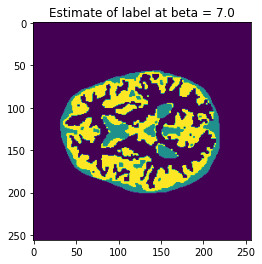

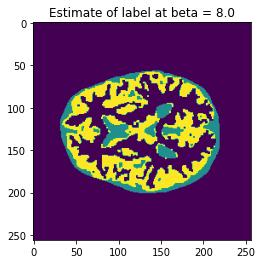

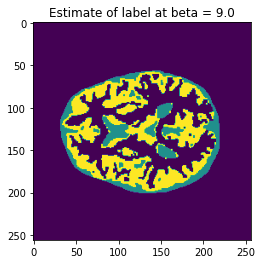

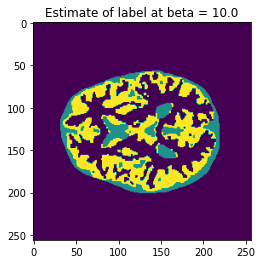

In [9]:
plt.figure()
plt.imshow(image,cmap='gray', vmin=0, vmax=1)
plt.title('Noisy image')
plt.show()

fig_shape = (5,2)
betas = np.linspace(1,10,10)


for i,beta in enumerate(betas):
    X_map, means, variances, memberships, _ = getOptimalParams(image,imageMask,X_map_init,means_init,variances_init,beta,max_iters=70, verbose=False, compute_posterior=False)
    plt.figure()
    plt.imshow(X_map)
    plt.title(f'Estimate of label at beta = {beta}')
    plt.show()


# Optimal Beta

In [10]:
beta = 1.0

In [11]:
X_map, means, variances, memberships, posterior_values = getOptimalParams(image,imageMask,X_map_init,means_init,variances_init,beta,max_iters=100)

0
---------------------------------------
Means [0.6294615  0.2818728  0.51298668]
Variances [0.00145183 0.00703899 0.00194089]
Log posterior -18400.40914928431 -15887.729954926639
---------------------------------------
1
---------------------------------------
Means [0.63063215 0.28927319 0.5168469 ]
Variances [0.00141694 0.00765475 0.00180255]
Log posterior -15103.687295455216 -14714.827676332716
---------------------------------------
2
---------------------------------------
Means [0.63134433 0.29456611 0.5191565 ]
Variances [0.00138633 0.00808959 0.00168538]
Log posterior -14878.204843100253 -14654.393572110564
---------------------------------------
3
---------------------------------------
Means [0.63178648 0.29803789 0.52057095]
Variances [0.0013668  0.00837913 0.00161242]
Log posterior -14858.53485126679 -14752.993134368377
---------------------------------------
4
---------------------------------------
Means [0.63202021 0.30082047 0.52155663]
Variances [0.00135549 0.0086123

Text(0.5, 1.0, 'Class 2')

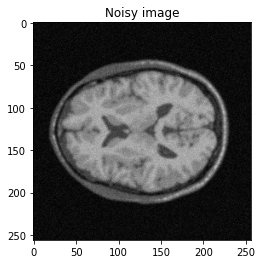

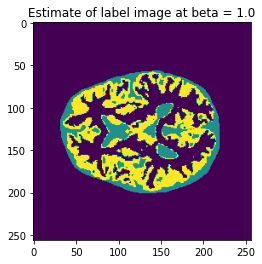

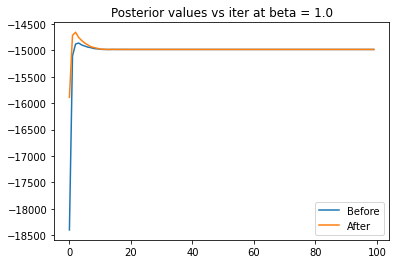

<Figure size 432x288 with 0 Axes>

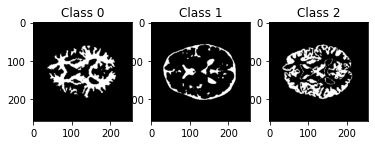

In [12]:
plt.figure()
plt.imshow(image,cmap='gray', vmin=0, vmax=1)
plt.title('Noisy image')
plt.figure()
plt.imshow(X_map)
plt.title(f'Estimate of label image at beta = {beta}')
plt.figure()
plt.plot(posterior_values[:,0],label='Before')
plt.plot(posterior_values[:,1],label='After')
plt.title(f'Posterior values vs iter at beta = {beta}')
plt.legend()
plt.figure()
_,axis = plt.subplots(1,3)
axis[0].imshow(memberships[:,:,0],cmap='gray', vmin=0, vmax=1)
axis[0].set_title('Class 0')
axis[1].imshow(memberships[:,:,1],cmap='gray', vmin=0, vmax=1)
axis[1].set_title('Class 1')
axis[2].imshow(memberships[:,:,2],cmap='gray', vmin=0, vmax=1)
axis[2].set_title('Class 2')